<a href="https://colab.research.google.com/github/Ishank2301/Pratise-ML-Algorithums/blob/main/support_vector_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support Vector Regression (SVR)

## Importing the libraries

In [125]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [126]:
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [127]:
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [128]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [129]:
y = y.reshape(len(y),1)

In [130]:
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


## Feature Scaling

In [131]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [132]:
print(X)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [133]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


## Training the SVR model on the whole dataset

In [134]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X, y)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

## Predicting a new result

In [135]:
sc_y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])).reshape(-1,1))

array([[170370.0204065]])

## Visualising the SVR results

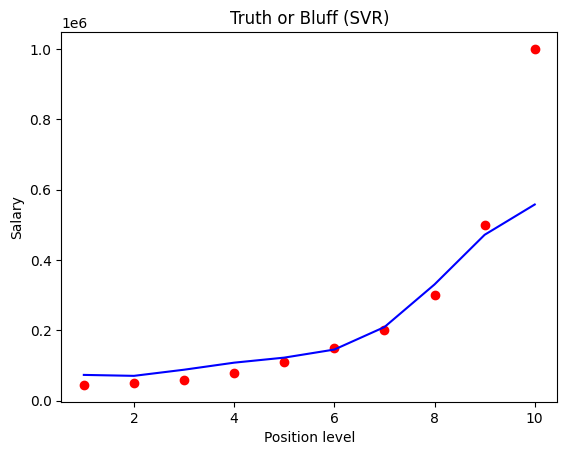

In [136]:
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'red')
plt.plot(sc_X.inverse_transform(X), sc_y.inverse_transform(regressor.predict(X).reshape(-1,1)), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

## Visualising the SVR results (for higher resolution and smoother curve)

/tmp/ipython-input-1412826726.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)), 0.1)


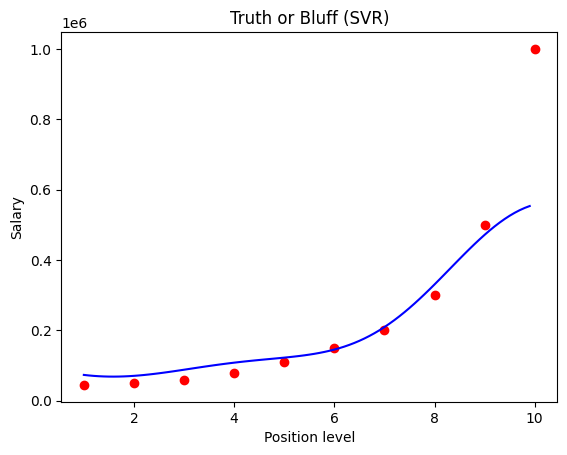

In [137]:
X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'red')
plt.plot(X_grid, sc_y.inverse_transform(regressor.predict(sc_X.transform(X_grid)).reshape(-1,1)), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

#Creating a graph where we can observe the epsilon tube of our model:

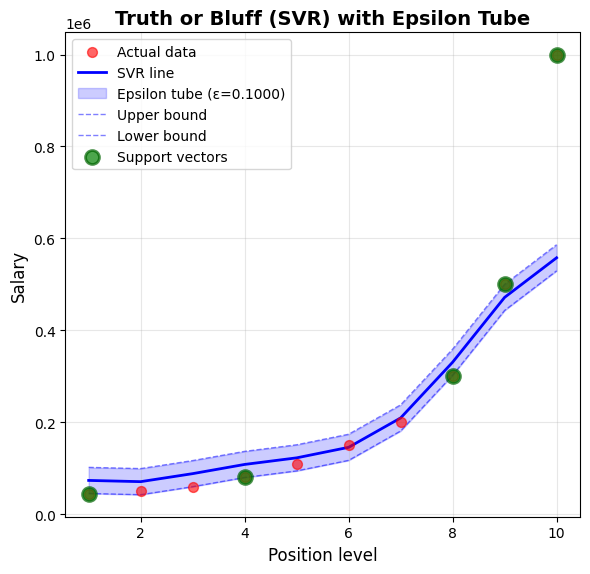

In [138]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

# Assuming you have X, y, sc_X, sc_y, and regressor already
# If not, here's example setup:
# X_scaled = your scaled features
# y_scaled = your scaled target
# regressor = your trained SVR model
# sc_X = StandardScaler fitted on original X
# sc_y = StandardScaler fitted on original y

# Get predictions on scaled data
y_pred_scaled = regressor.predict(X).reshape(-1, 1)

# Get epsilon value from the model
epsilon = regressor.epsilon

# Inverse transform predictions and epsilon bounds to original scale
X_original = sc_X.inverse_transform(X)
y_original = sc_y.inverse_transform(y)
y_pred_original = sc_y.inverse_transform(y_pred_scaled)

# Scale epsilon to original dimensions
# epsilon_scaled is in scaled space, convert to original space
epsilon_original = epsilon * sc_y.scale_[0]  # Scale factor for y

# Create upper and lower bounds in original scale
y_upper = y_pred_original + epsilon_original
y_lower = y_pred_original - epsilon_original

# Plot
plt.figure(figsize=(6, 6))

# Plot actual data
plt.scatter(X_original, y_original, color='red', s=50, alpha=0.6, label='Actual data', zorder=3)

# Plot regression line in original scale
plt.plot(X_original, y_pred_original, color='blue', linewidth=2, label='SVR line', zorder=2)

# Plot epsilon tube in original scale
plt.fill_between(X_original.ravel(),
                  y_lower.ravel(),
                  y_upper.ravel(),
                  alpha=0.2, color='blue', label=f'Epsilon tube (ε={epsilon:.4f})', zorder=1)

# Plot upper and lower boundaries
plt.plot(X_original, y_upper, 'b--', linewidth=1, alpha=0.5, label='Upper bound')
plt.plot(X_original, y_lower, 'b--', linewidth=1, alpha=0.5, label='Lower bound')

# Highlight support vectors
plt.scatter(X_original[regressor.support_], y_original[regressor.support_],
           color='green', s=100, alpha=0.7,
           edgecolors='darkgreen', linewidth=2,
           label='Support vectors', zorder=4)

plt.xlabel('Position level', fontsize=12)
plt.ylabel('Salary', fontsize=12)
plt.title('Truth or Bluff (SVR) with Epsilon Tube', fontsize=14, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

#Creating a graph where we can observe the epsilon tube

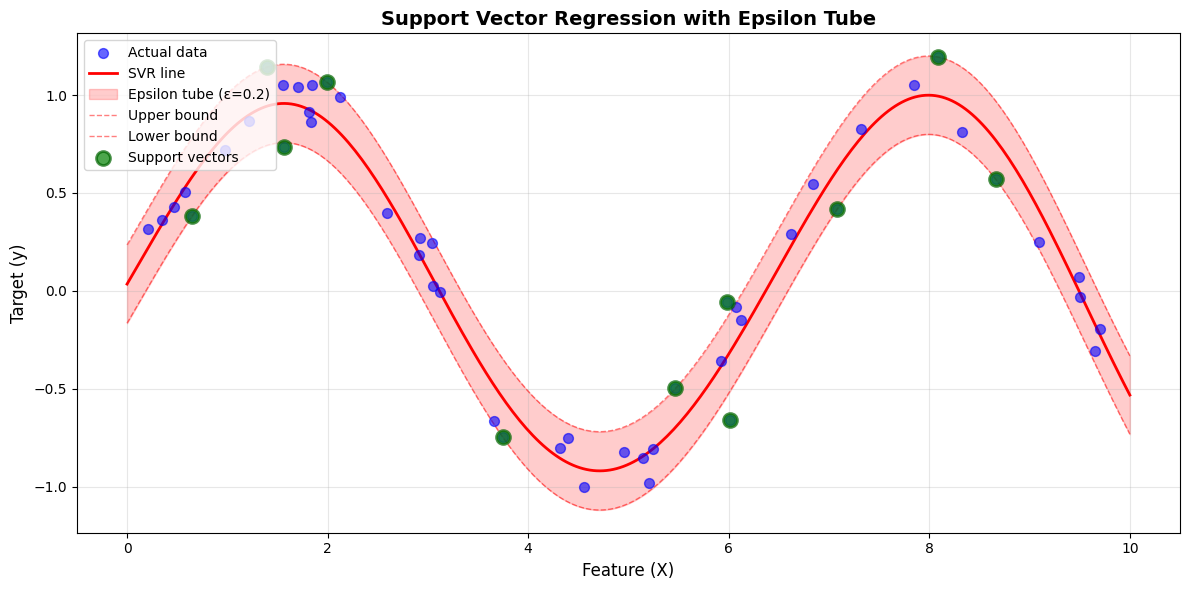

In [139]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR

# Generate sample data
np.random.seed(42)
X = np.sort(np.random.rand(50) * 10).reshape(-1, 1)
y = np.sin(X).ravel() + np.random.normal(0, 0.15, X.shape[0])

# Train SVR with specific epsilon
epsilon = 0.2  # You can change this
svr = SVR(kernel='rbf', C=100, epsilon=epsilon)
svr.fit(X, y)

# Generate smooth predictions for plotting
X_test = np.linspace(0, 10, 300).reshape(-1, 1)
y_pred = svr.predict(X_test)

# Create the plot
plt.figure(figsize=(12, 6))

# Plot actual data points
plt.scatter(X, y, color='blue', s=50, alpha=0.6, label='Actual data', zorder=3)

# Plot regression line
plt.plot(X_test, y_pred, 'r-', linewidth=2, label='SVR line', zorder=2)

# Plot epsilon tube (upper and lower bounds)
plt.fill_between(X_test.ravel(),
                  (y_pred - epsilon),
                  (y_pred + epsilon),
                  alpha=0.2, color='red', label=f'Epsilon tube (ε={epsilon})', zorder=1)

# Plot upper and lower boundaries
plt.plot(X_test, y_pred + epsilon, 'r--', linewidth=1, alpha=0.5, label='Upper bound')
plt.plot(X_test, y_pred - epsilon, 'r--', linewidth=1, alpha=0.5, label='Lower bound')

# Highlight support vectors
plt.scatter(X[svr.support_], y[svr.support_],
           color='green', s=100, alpha=0.7,
           edgecolors='darkgreen', linewidth=2,
           label='Support vectors', zorder=4)

plt.xlabel('Feature (X)', fontsize=12)
plt.ylabel('Target (y)', fontsize=12)
plt.title('Support Vector Regression with Epsilon Tube', fontsize=14, fontweight='bold')
plt.legend(fontsize=10, loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()